In [23]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [221]:
# Libraries To Use
from __future__ import division 
from CloudQuant import MiniSimulator 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import os
from sklearn import linear_model
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
%matplotlib inline

In [533]:
path = 'D:/cStrategy/Factor/'
filenamey='LZ_GPA_VAL_PE.csv'
filenamex='LZ_GPA_VAL_A_FCAP.csv'
filenamez='LZ_GPA_INDU_ZX.csv'
filenamePirce='LZ_GPA_QUOTE_TCLOSE.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenamePB='LZ_GPA_VAL_PB.csv'

In [436]:
timeStampNum = 500
thresholdNum = 0.2

In [28]:
path+filenamey

'D:/cStrategy/Factor/LZ_GPA_VAL_PE.csv'

In [29]:
for name in os.listdir(path):
    if name.endswith(".csv"):
        print name

LZ_GPA_ACHFCST_ENDDATE.csv
LZ_GPA_CMFTR_CUM_FACTOR.csv
LZ_GPA_DERI_VWAP.csv
LZ_GPA_EXCH_CAL.csv
LZ_GPA_FIN_IND_QFA_CGRGR.csv
LZ_GPA_FIN_IND_QFA_YOYGR.csv
LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv
LZ_GPA_FIN_IND_QFA_YOYOP.csv
LZ_GPA_FIN_IND_QFA_YOYPROFIT.csv
LZ_GPA_FIN_IND_YOYOCF.csv
LZ_GPA_FIN_IND_YOYROE.csv
LZ_GPA_INDU_SW.csv
LZ_GPA_INDU_ZX.csv
LZ_GPA_INDXQUOTE_CLOSE.csv
LZ_GPA_INDXQUOTE_HIGH.csv
LZ_GPA_INDXQUOTE_OPEN.csv
LZ_GPA_INDXQUOTE_VOLUME.csv
LZ_GPA_QUOTE_TCLOSE.csv
LZ_GPA_QUOTE_TOPEN.csv
LZ_GPA_QUOTE_TVOLUME.csv
LZ_GPA_SLCIND_ST_FLAG.csv
LZ_GPA_SLCIND_TRADEDAYCOUNT.csv
LZ_GPA_TMP_INDEX.csv
LZ_GPA_TMP_INDU_SW.csv
LZ_GPA_TMP_INDU_ZX.csv
LZ_GPA_TMP_STK.csv
LZ_GPA_TURNOVER_TurnoverAvg_1M.csv
LZ_GPA_TURNOVER_TurnoverAvg_1M_3M.csv
LZ_GPA_TURNOVER_TurnoverAvg_3M.csv
LZ_GPA_USR_MOM.csv
LZ_GPA_VAL_A_FCAP.csv
LZ_GPA_VAL_A_TCAP.csv
LZ_GPA_VAL_PB.csv
LZ_GPA_VAL_PC.csv
LZ_GPA_VAL_PE.csv
LZ_GPA_VAL_PS.csv
LZ_GPA_VAL_PS_TTM.csv


In [438]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)
stDF = stDF[-timeStampNum-10:-5]

In [443]:
stDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2017-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)
tradeDayDF = tradeDayDF[-timeStampNum-10:-5]

In [448]:
tradeDayDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_TRADEDAYCOUNTi,,,,,,,,,,,,,,,,,,,,,
2017-02-10,6469,6462,6462,6462,6462,6462,6462,NaN,6443,6430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-13,6470,6463,6463,6463,6463,6463,6463,NaN,6444,6431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-14,6471,6464,6464,6464,6464,6464,6464,NaN,6445,6432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,6472,6465,6465,6465,6465,6465,6465,NaN,6446,6433,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,6473,6466,6466,6466,6466,6466,6466,NaN,6447,6434,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [446]:
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)
stopFlagDF = stopFlagDF[-timeStampNum-10:-5]

In [447]:
stopFlagDF.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300615.SZ,601212.SH,002849.SZ,603603.SH,300611.SZ,300613.SZ,603817.SH,600939.SH,603238.SH,603345.SH
LZ_GPA_SLCIND_STOP_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2017-02-10,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-13,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-14,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-15,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-16,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [388]:
### get the list of ST, new  and delisted stocks on given date
def GetSTNewSuspend(Date):  ## Date is DateFrame time Index with hour second 
    tempoDF1 = stDF.loc[Date]
    tempoDF2 = tradeDayDF.loc[Date]
    tempoDF3 = stopFlagDF.loc[Date]
    stockList1 = tempoDF1[~tempoDF1.isnull()].index.tolist()
    stockList2 = tempoDF2[tempoDF2 < 60].index.tolist()
    stockList3 = tempoDF3[~tempoDF3.isnull()].index.tolist()
    totalList = set(list(set(stockList1) | set(stockList2) | set(stockList3)))
    return list(totalList)

In [431]:
PEData=pd.read_csv(path+filenamey,infer_datetime_format=True,parse_dates=[0],index_col=0)
#PEData=PEData.tail(300)[:250].dropna(axis=1,how='any')
PEData=PEData.tail(300)[:250]
PEData

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300610.SZ,603330.SH,603615.SH,603839.SH,300609.SZ,300612.SZ,300615.SZ,601212.SH,002849.SZ,603603.SH
LZ_GPA_VAL_PE-d,,,,,,,,,,,,,,,,,,,,,
2015-11-25,224.1141,60.5540,114.3897,196.0445,NaN,NaN,233.4496,NaN,892.4821,10.2177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-26,224.1141,59.3798,111.3709,196.0445,NaN,NaN,224.6491,NaN,883.2038,10.1756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-27,201.6603,54.0121,101.2365,196.0445,NaN,NaN,227.3362,NaN,821.5695,10.0072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-30,197.4238,52.3347,98.6490,196.0445,NaN,NaN,215.7813,NaN,880.1111,10.5756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-01,201.8722,52.8380,99.6193,196.0445,NaN,NaN,215.7813,NaN,894.9121,11.6353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-02,202.7195,53.0057,97.8943,196.0445,NaN,NaN,215.8485,NaN,857.5781,12.8002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-03,204.6259,54.0121,101.2365,196.0445,NaN,NaN,227.9409,NaN,870.3910,13.4399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,204.6259,53.4251,111.3709,196.0445,NaN,NaN,225.3880,NaN,886.2966,13.3206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-07,204.6259,54.3476,112.0178,196.0445,NaN,NaN,223.8429,NaN,939.3153,12.6469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
### This function to get he end of trading day of each month!
def getLastDayOfMonth(datetimeIndex):     ### This datetimeIndex should be chosen as dataframe.index
    timeTuple =sorted(list(set(zip(datetimeIndex.year,datetimeIndex.month))))
    #print timeTuple
    startOftheMonth=[]
    endOftheMonth=[]
    for time in timeTuple:
        targetList = datetimeIndex[(datetimeIndex.year==time[0])&(datetimeIndex.month==time[1])]
        startOftheMonth.append(targetList[0])
        endOftheMonth.append(targetList[-1])
    return startOftheMonth, endOftheMonth        

In [821]:
##### Function
def disposeData(df,timeStamp,replace=False):
    df = df.tail(timeStamp+5)[-timeStamp-1:-1] ### To delete the last row which is usually all nan value
    enoughDataStock = df.isnull().sum ()< (timeStamp*thresholdNum)
    enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
    df = df[enoughDataStockList]
    df = df.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
    df = df.fillna(method='bfill')   ### Fill N/A value with the next valid obsevation  maybe Mean of the each column should be used? not sure here
    if replace:                      ###  Replace the extreme value with 3*standar deviation
        df = df.clip(df.mean()-2*df.std(),df.mean()+2*df.std(),axis=1)
    else:
        df = df[(df>(df.mean()-2*df.std()))&(df<(df.mean()+2*df.std()))]  ### Winsorize. This means we delete the values / maybe we should replace thevalue wtih 
    df = (df-df.mean())/df.std()    ### Normalize
    df.fillna(0,inplace=True)
    #df.dropna(axis=1,how='any',inplace=True)
    return df

In [36]:
PEData=disposeData(PEData,timeStampNum,True)
FCAPData=disposeData(FCAPData,timeStampNum,True)

In [186]:
### This function is to generate industry dummy matrix
def  generateIndDF(path,filename,timeStamp):
    InData=pd.read_csv(path+filename,infer_datetime_format=True,parse_dates=[0],index_col=0)
    #InData= InData.tail(timeStamp+5)[-timeStamp-1:-1].dropna(axis=1,how='any')
    InData= InData.tail(timeStamp+5)[-11:-1].dropna(axis=1,how='any')
    InduNum=int(InData.max().max()-InData.min().min())
    x=range(InduNum)
    DummyDF=pd.DataFrame(index=x,columns=InData.columns.tolist(),data=None)
    for stk in DummyDF.columns.tolist():
        Tag = int(InData[stk].iloc[-1])
        if Tag == InduNum+1:
            pass
        else:
            DummyArray = np.zeros(InduNum)
            DummyArray[Tag-1] = 1
            DummyDF[stk] = DummyArray
    return DummyDF

In [652]:
### Wrap into function 
### This function is to calculate the stocks grouped based by factor value,u cam also use 'quantile' method to get the groups 
def getStockGroup(factorData,groupNum=10,Mean_Num=20,ascendingFlag=True):   ## factorData is disposed data which have been winsorized, normalized and neutralized
    groupDic={}
    if Mean_Num ==1:
        sortedStk=factorData.iloc[-1].sort_values(ascending=ascendingFlag)
    else:
        sortedStk=factorData.iloc[-Mean_Num:].mean().sort_values(ascending=ascendingFlag)
    #print factorData.index[-1]
    stkNumPerGFloor = int(np.floor(len(sortedStk)/groupNum))
    stkNumPerGCeil = int(np.ceil(len(sortedStk)/groupNum))
    remainderCount=int(np.mod(len(sortedStk),groupNum))
    for i in xrange(groupNum):
        if i< remainderCount:
            groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:(i+1)*stkNumPerGCeil].index.tolist()
        elif i == remainderCount:
            groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:i*stkNumPerGCeil+stkNumPerGFloor].index.tolist()
        else:
            groupDic['group'+'_'+str(i)] = sortedStk[remainderCount+i*stkNumPerGFloor:remainderCount+(i+1)*stkNumPerGFloor].index.tolist()
    return groupDic

In [39]:
DummyDF=generateIndDF(path,filenamez,timeStampNum).dropna(axis=1)

In [40]:
StockPoolOLS = list(set(FCAPData.columns.tolist()) & set(PEData.columns.tolist())&set(DummyDF.columns.tolist()))
len(StockPoolOLS)
PEData = PEData[StockPoolOLS]
FCAPData = FCAPData[StockPoolOLS]
DummyDF = DummyDF[StockPoolOLS] 

In [41]:
Group=getStockGroup(PEData,groupNum=10,Mean_Num=20,ascendingFlag=True)

In [42]:
DummyDF .shape

(28, 501)

In [188]:
###### Neutralize 
def neutralizeData(factorDataFrame,DummyDF):  ### DummyDF is the Dummy variable Dataframe
    FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
    #Period = len(FCAPData)
    for time in FinalDF.index: 
        CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
        #print CrossSecData.T.iloc[-1]
        #print DummyDF.shape
        Y=factorDataFrame[factorDataFrame.index==time].T
        #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
        #InsertArray = FCAPData[stk].values
        #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
        #print (InsertArray)
        #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
        #print (InDependence)
        #try:
        result=sm.OLS(Y,CrossSecData).fit()
        #except:
        #pass
        FinalDF.loc[time] = result.resid
    return FinalDF

FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
Period = len(InData)
for time in FinalDF.index: 
    CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
    #print CrossSecData.T.iloc[-1]
    Y=PEData[PEData.index==time].T
    #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
    #InsertArray = FCAPData[stk].values
    #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
    #print (InsertArray)
    #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
    #print (InDependence)
    #try:
    result=sm.OLS(Y,CrossSecData).fit()
    #except:
    #pass
    FinalDF.loc[time] = result.resid

In [ ]:
#neutralizedDF=neutralizeData(PEData,DummyDF)

In [ ]:
neutralizedDF[SSS].iloc[-1].sort_values().index.tolist()

In [ ]:
groupedStk=getStockGroup(neutralizedDF,groupNum=10,Mean_Num=20,ascendingFlag=True)

In [ ]:
for i,j in groupedStk.iteritems():
    print '%s has %d stocks' %(i,len(j))

In [660]:
###
PriceData=pd.read_csv(path+filenamePirce,infer_datetime_format=True,parse_dates=[0],index_col=0)
PriceData=PriceData[-timeStampNum-1:-5]
enoughDataStock = PriceData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PriceData = PriceData[enoughDataStockList]
PriceData = PriceData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PriceData = PriceData.fillna(method='bfill') 
PriceData.dropna(inplace=True)

In [822]:
###
PEData=pd.read_csv(path+filenamey,infer_datetime_format=True,parse_dates=[0],index_col=0)
PEData=PEData[-timeStampNum-1:-5]
enoughDataStock = PEData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PEData = PEData[enoughDataStockList]
PEData = PEData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PEData = PEData.fillna(method='bfill')
#EData  = PEData.clip(PEData.mean()-2*PEData.std(),PEData.mean()+2*PEData.std(),axis=1)
PEData.dropna(inplace=True)

In [823]:
###
PBData=pd.read_csv(path+filenamePB,infer_datetime_format=True,parse_dates=[0],index_col=0)
PBData=PBData[-timeStampNum-1:-5]
enoughDataStock = PBData.isnull().sum ()< (timeStampNum*thresholdNum)
enoughDataStockList = enoughDataStock[enoughDataStock==True].index.tolist()
PBData = PBData[enoughDataStockList]
PBData = PBData.fillna(method='ffill')   ### Fill N/A value with the last valid obsevation 
PBData = PBData.fillna(method='bfill')
#PBData  = PBData.clip(PBData.mean()-2*PBData.std(),PBData.mean()+2*PBData.std(),axis=1)
PBData.dropna(inplace=True)

In [663]:
PBData.shape

(496, 2722)

In [664]:
#PBandPricePOOL = list(set(PBData.columns.tolist())&set(PriceData.columns.tolist()))
#PBData=PBData[PBandPricePOOL]
#PriceData=PriceData[PBandPricePOOL]

In [665]:
PEData.shape

(496, 2240)

In [666]:
PEData.isnull().sum().sum()

0

In [667]:
PriceData.isnull().sum().sum()

0

In [709]:
PriceData.shape

(496, 2240)

In [824]:
PEandPricePOOL = list(set(PEData.columns.tolist())&set(PriceData.columns.tolist()))
PEData=PEData[PEandPricePOOL]
PriceData=PriceData[PEandPricePOOL]

In [670]:
set(PEData.columns.tolist())==set(PriceData.columns.tolist())

True

In [825]:
a,b=getLastDayOfMonth(PriceData.index)
b

[Timestamp('2015-01-30 00:00:00'),
 Timestamp('2015-02-27 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-31 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-30 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-29 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-29 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-29 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-02-13 00:00:00')]

In [826]:
### 
filterdict={}
for i in b:
    filterdict[i] = GetSTNewSuspend(i)
    print i, len(filterdict[i])

2015-01-30 00:00:00 387
2015-02-27 00:00:00 396
2015-03-31 00:00:00 481
2015-04-30 00:00:00 481
2015-05-29 00:00:00 574
2015-06-30 00:00:00 636
2015-07-31 00:00:00 673
2015-08-31 00:00:00 627
2015-09-30 00:00:00 514
2015-10-30 00:00:00 479
2015-11-30 00:00:00 393
2015-12-31 00:00:00 379
2016-01-29 00:00:00 373
2016-02-29 00:00:00 400
2016-03-31 00:00:00 401
2016-04-29 00:00:00 437
2016-05-31 00:00:00 424
2016-06-30 00:00:00 408
2016-07-29 00:00:00 371
2016-08-31 00:00:00 372
2016-09-30 00:00:00 384
2016-10-31 00:00:00 374
2016-11-30 00:00:00 389
2016-12-30 00:00:00 404
2017-01-26 00:00:00 428
2017-02-13 00:00:00 453


In [827]:
###
totalGroupDict={}
for endDate in b:
    factorDataTemp = PEData.loc[:endDate].tail(20)
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[endDate]))]
    #print factorDataTemp
    totalGroupDict[endDate] = getStockGroup(factorDataTemp,Mean_Num=1)
#totalGroupDict

In [674]:
o=5
monthEndData[totalGroupDict[b[-o]]['group_0']].mean(axis=1).loc[b[-o]]

0.060349513538027012

In [675]:
monthEndData[totalGroupDict[b[-o]]['group_9']].mean(axis=1).loc[b[-o]]

0.031480018169117108

In [676]:
for i,j in totalGroupDict.iteritems():
    for p,q in j.iteritems():
        print '%s %s : %d' %(i,p,len(q))

2015-01-30 00:00:00 group_3 : 201
2015-01-30 00:00:00 group_2 : 201
2015-01-30 00:00:00 group_1 : 201
2015-01-30 00:00:00 group_0 : 201
2015-01-30 00:00:00 group_7 : 200
2015-01-30 00:00:00 group_6 : 200
2015-01-30 00:00:00 group_5 : 200
2015-01-30 00:00:00 group_4 : 201
2015-01-30 00:00:00 group_9 : 200
2015-01-30 00:00:00 group_8 : 200
2016-12-30 00:00:00 group_3 : 211
2016-12-30 00:00:00 group_2 : 211
2016-12-30 00:00:00 group_1 : 211
2016-12-30 00:00:00 group_0 : 211
2016-12-30 00:00:00 group_7 : 210
2016-12-30 00:00:00 group_6 : 210
2016-12-30 00:00:00 group_5 : 210
2016-12-30 00:00:00 group_4 : 210
2016-12-30 00:00:00 group_9 : 210
2016-12-30 00:00:00 group_8 : 210
2016-06-30 00:00:00 group_3 : 205
2016-06-30 00:00:00 group_2 : 205
2016-06-30 00:00:00 group_1 : 205
2016-06-30 00:00:00 group_0 : 206
2016-06-30 00:00:00 group_7 : 205
2016-06-30 00:00:00 group_6 : 205
2016-06-30 00:00:00 group_5 : 205
2016-06-30 00:00:00 group_4 : 205
2016-06-30 00:00:00 group_9 : 205
2016-06-30 00:

In [828]:
### 
ReturnDF=pd.DataFrame(index=b[:-1],columns=totalGroupDict.values()[0].keys(),data=None)

#ReturnDF['SAD']=Group1Return['Return of the Group0']

In [829]:
ReturnDF.sort_index(axis=1,inplace=True)
ReturnDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [830]:
###
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]

In [809]:
monthEndData

,000916.SZ,300081.SZ,600190.SH,000713.SZ,300192.SZ,603123.SH,300034.SZ,000528.SZ,002665.SZ,000685.SZ,...,600373.SH,300201.SZ,002241.SZ,600525.SH,600769.SH,000002.SZ,002338.SZ,603021.SH,600630.SH,002164.SZ
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-01-30,0.026515,0.000000,0.037665,-0.033304,0.000000,0.018744,0.052766,0.103013,0.021476,0.139478,...,0.132514,0.126876,0.036585,0.199001,0.155727,-0.028201,0.067674,0.000000,0.054364,0.081531
2015-02-27,0.210332,1.229862,0.114338,0.112421,0.000000,0.114995,0.281730,0.188546,0.341953,0.073962,...,0.137515,0.000000,0.119328,0.021416,0.183742,0.083922,0.141799,0.000000,0.129993,0.364615
2015-03-31,0.306402,-0.083524,0.166124,0.105949,0.000000,0.093234,0.032797,0.052632,-0.534306,0.149013,...,0.098091,0.331719,-0.017718,0.266162,0.191910,0.056440,0.033957,0.610183,0.244859,0.546787
2015-04-30,0.047841,0.393963,0.494413,0.240236,0.464789,0.206038,0.408855,0.007042,0.260247,0.126884,...,0.592467,1.036364,0.244268,0.448022,0.098658,-0.017123,0.732472,3.365613,-0.024781,0.326531
2015-05-29,-0.073497,-0.354483,-0.256075,-0.156269,0.183432,-0.148936,-0.230819,-0.173427,-0.150046,-0.084603,...,-0.273499,-0.290179,-0.117936,-0.346569,-0.133621,0.011847,-0.222577,-0.511883,-0.170990,-0.187912
2015-06-30,-0.224760,-0.343803,-0.268844,-0.205634,-0.365000,-0.270588,-0.213863,-0.187817,0.010830,-0.490316,...,-0.044658,-0.125786,-0.174095,0.022849,-0.167496,-0.023416,-0.095890,0.009274,0.002554,-0.338295
2015-07-31,-0.151938,-0.250733,-0.039519,-0.125000,-0.138780,-0.082661,-0.267742,-0.127083,-0.185714,-0.213333,...,-0.017912,-0.130935,-0.206071,0.000000,-0.115538,-0.026798,-0.287727,0.259132,0.100637,-0.290389
2015-08-31,-0.076782,0.149935,-0.116279,-0.072948,0.267429,-0.038462,0.127264,-0.119332,0.070175,-0.061864,...,-0.068060,0.001656,0.004673,0.000000,-0.087838,-0.077536,0.005956,-0.411969,0.078704,-0.066282
2015-09-30,0.126733,0.284958,0.255061,0.171585,0.145176,0.209143,0.218411,0.165312,0.093443,0.267389,...,0.184248,0.239669,0.082030,0.000000,0.212346,0.073841,0.215479,0.228669,0.406116,0.239198


In [810]:
len(monthEndData.columns.tolist())

2240

In [682]:
monthEndData[totalGroupDict[b[0]]['group_3']]

,603355.SH,300468.SZ,002750.SZ,002367.SZ,002757.SZ,300440.SZ,002767.SZ,600497.SH,300476.SZ,600643.SH,...,600525.SH,600566.SH,600650.SH,002550.SZ,601933.SH,002267.SZ,000963.SZ,300225.SZ,000560.SZ,300375.SZ
LZ_GPA_QUOTE_TCLOSE-d,,,,,,,,,,,,,,,,,,,,,
2015-01-30,0.000000,0.000000,0.000000,0.062914,0.000000,0.000000,0.000000,0.001761,0.000000,0.234657,...,0.199001,-0.000484,-0.008767,0.031503,0.030303,0.153720,0.000375,0.050950,0.101685,0.030353
2015-02-27,0.000000,0.000000,0.610675,0.269470,0.000000,0.000000,0.000000,0.201230,0.000000,0.099415,...,0.021416,0.143687,0.077241,0.317375,0.255991,0.036853,0.163575,0.221857,0.263641,0.107330
2015-03-31,0.000000,0.000000,0.548689,0.003067,0.000000,0.610880,0.000000,0.215801,0.000000,0.051596,...,0.266162,0.080372,0.163656,0.141604,-0.027754,0.076555,0.122383,0.093477,0.357546,0.103114
2015-04-30,2.139010,0.209922,0.499081,0.584098,0.209877,1.596941,0.000000,-0.067990,0.000000,0.190693,...,0.448022,0.197729,0.221072,-0.223381,0.281891,0.071746,0.090387,0.242312,0.126338,-0.346981
2015-05-29,-0.431254,1.634639,-0.108932,0.100000,0.728039,-0.451924,1.029893,-0.058102,1.101545,-0.289295,...,-0.346569,-0.036286,-0.199153,-0.257597,-0.193459,-0.082346,-0.059474,-0.542574,-0.181842,-0.247352
2015-06-30,0.185487,-0.186992,-0.020637,0.000000,0.036970,-0.084578,0.027382,-0.311172,-0.030462,0.000000,...,0.022849,-0.199457,-0.163059,-0.191813,-0.126833,-0.014848,0.000000,-0.255411,-0.283226,-0.038798
2015-07-31,-0.403370,-0.341857,-0.272326,0.000000,-0.242387,-0.298521,-0.337514,-0.188060,-0.302059,0.000000,...,0.000000,-0.032203,0.217241,-0.206125,0.036561,-0.184797,0.021265,-0.109012,-0.080558,-0.376336
2015-08-31,-0.050720,0.114608,-0.658025,-0.522991,-0.084967,0.123017,-0.027045,0.037990,0.006209,0.000000,...,0.000000,0.033275,0.444759,-0.024481,-0.032412,-0.078778,-0.043151,-0.030995,-0.663730,-0.013325
2015-09-30,0.227383,0.375852,0.164516,0.275938,0.245357,0.547707,0.214038,0.173554,0.236038,0.000000,...,0.000000,0.081780,0.491176,0.277567,0.078818,0.133508,0.085469,0.198653,0.353712,0.247588


In [831]:
### iteration in iteration?Nope! Can I use apply method?
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group]= monthEndData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-01-30,0.0368347,0.0497902,0.0506751,0.0683783,0.0739608,0.0827102,0.104991,0.102431,0.110624,0.0897617
2015-02-27,0.193496,0.202496,0.154154,0.218382,0.225761,0.210416,0.222312,0.231546,0.24433,0.240309
2015-03-31,0.159486,0.156479,0.147123,0.106194,0.0999946,0.117575,0.169768,0.10178,0.169729,0.154996
2015-04-30,0.0825083,0.244456,0.160321,0.184588,0.202996,0.236357,0.247749,0.203744,0.249287,0.233128
2015-05-29,0.0414189,0.0444986,-0.12848,-0.135762,-0.160467,-0.147132,-0.16629,-0.188475,-0.172058,-0.141685
2015-06-30,-0.160954,-0.147788,-0.155893,-0.184631,-0.174317,-0.182033,-0.174075,-0.20572,-0.200633,-0.213123
2015-07-31,-0.116319,-0.121913,-0.122433,-0.149082,-0.152154,-0.173852,-0.153081,-0.176912,-0.172313,-0.155643
2015-08-31,-0.0626518,-0.0462705,-0.0437668,-0.0357409,-0.0459316,-0.0299701,-0.0349584,-0.0259451,-0.0556779,-0.0400829
2015-09-30,0.140928,0.196946,0.205138,0.20899,0.223854,0.235212,0.239458,0.253898,0.243412,0.272727
2015-10-30,0.0466998,0.0566706,0.0821211,0.122588,0.131883,0.113334,0.170675,0.116601,0.0988399,0.144765


In [832]:
###
ReturnDF.fillna(0.,inplace=True)
cumulativeRDF = ReturnDF.cumsum()

In [833]:
###
cumulativeRDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-01-30,0.036835,0.049790,0.050675,0.068378,0.073961,0.082710,0.104991,0.102431,0.110624,0.089762
2015-02-27,0.230330,0.252286,0.204829,0.286761,0.299722,0.293126,0.327303,0.333977,0.354954,0.330071
2015-03-31,0.389816,0.408766,0.351953,0.392954,0.399716,0.410701,0.497071,0.435757,0.524684,0.485067
2015-04-30,0.472324,0.653221,0.512273,0.577543,0.602713,0.647059,0.744819,0.639501,0.773971,0.718195
2015-05-29,0.513743,0.697720,0.383793,0.441781,0.442246,0.499927,0.578529,0.451026,0.601913,0.576510
2015-06-30,0.352790,0.549932,0.227900,0.257149,0.267929,0.317894,0.404454,0.245307,0.401281,0.363386
2015-07-31,0.236471,0.428019,0.105467,0.108067,0.115774,0.144042,0.251374,0.068395,0.228967,0.207744
2015-08-31,0.173819,0.381749,0.061700,0.072326,0.069843,0.114071,0.216415,0.042450,0.173289,0.167661
2015-09-30,0.314746,0.578695,0.266839,0.281316,0.293697,0.349284,0.455873,0.296348,0.416701,0.440388
2015-10-30,0.361446,0.635365,0.348960,0.403904,0.425580,0.462618,0.626548,0.412949,0.515541,0.585153


In [790]:
cumulativeForPlot = cumulativeRDF.copy()

In [791]:
cumulativeForPlot.index = cumulativeForPlot.index.map(lambda x:100*x.year+x.month)

In [793]:
cumulativeForPlot.index

Int64Index([201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508,
            201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604,
            201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612,
            201701],
           dtype='int64')

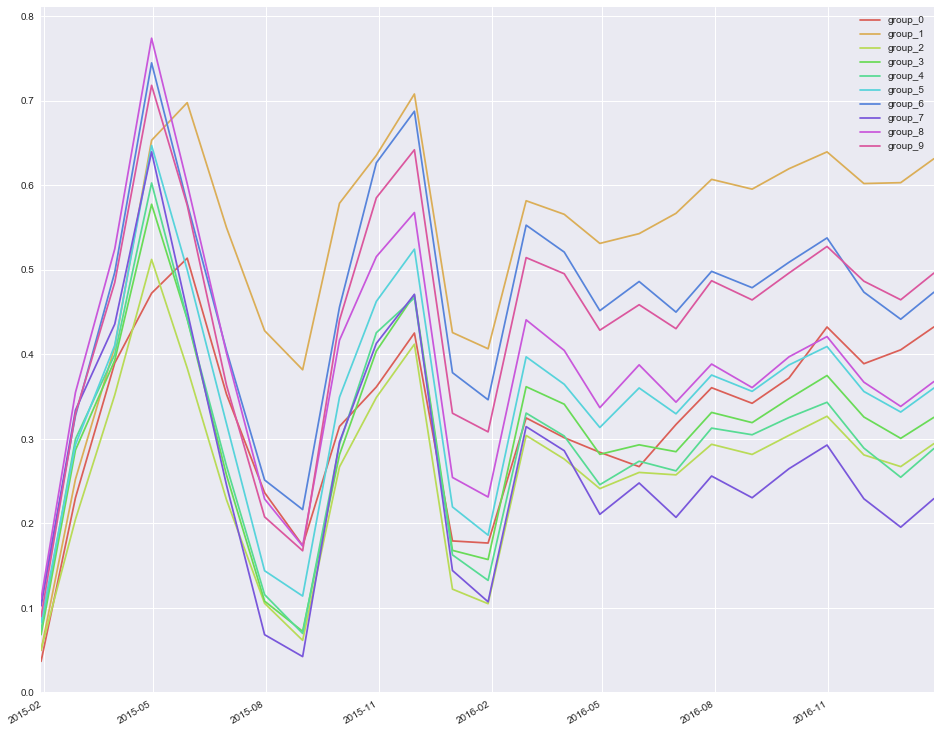

In [834]:
#plt.figure()
#my_colors = [(x/10.0, x/90.0, 0.35) for x in range(len(cumulativeRDF))] # <-- Quick gradient example along the Red/Green dimensions.
cumulativeRDF.plot(figsize=(16,14),color=sns.color_palette("hls",10))

In [688]:
#getStockGroup(ReturnDF,groupNum=3,Mean_Num=1,ascendingFlag=True)

In [743]:
ReturnDF.index

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31',
               '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30',
               '2017-01-26'],
              dtype='datetime64[ns]', freq=None)

In [814]:
ReturnForPlot =ReturnDF.copy()

In [815]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+x.month)

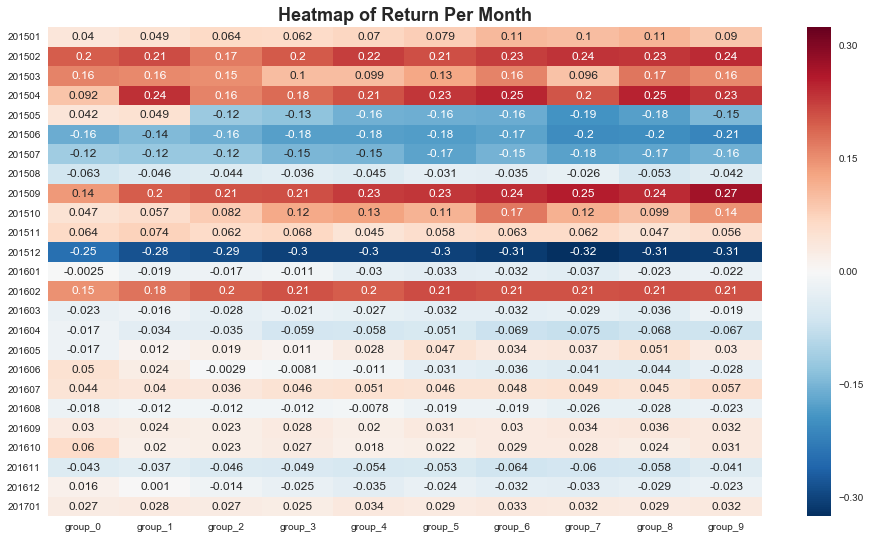

In [816]:
plt.figure(figsize=(16,9))
ax = plt.axes()
sns.heatmap(ReturnForPlot,ax=ax, annot=True)
ax.set_title('Heatmap of Return Per Month',fontsize=18, fontweight='bold')
plt.show()

In [692]:
### Calculate deviation of each group
ReturnDeviationDF = ReturnDF.apply(lambda x: x-x.mean(),axis=1)

In [693]:
ReturnDeviationDF 

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
201501,-0.036972,-0.028060,-0.012732,-0.014970,-0.006704,0.002061,0.028340,0.023373,0.032555,0.013110
201502,-0.018439,-0.001822,-0.046415,-0.015674,0.010289,-0.004920,0.010704,0.020716,0.017977,0.027584
201503,0.022627,0.018786,0.012069,-0.037450,-0.038951,-0.011607,0.022896,-0.042371,0.035306,0.018695
201504,-0.112871,0.032197,-0.043908,-0.021599,0.002762,0.026656,0.044144,-0.000769,0.044774,0.028615
201505,0.157335,0.164631,-0.004966,-0.014579,-0.041097,-0.042234,-0.046246,-0.079263,-0.063819,-0.029764
201506,0.018963,0.035815,0.020451,0.001025,0.000194,-0.002166,0.006625,-0.024022,-0.022871,-0.034015
201507,0.033051,0.027457,0.026937,0.000288,-0.002784,-0.023871,-0.004321,-0.027541,-0.022943,-0.006272
201508,-0.020551,-0.004170,-0.001666,0.006360,-0.002448,0.010748,0.007142,0.016156,-0.011369,-0.000202
201509,-0.081129,-0.025111,-0.016248,-0.013737,0.004463,0.010490,0.017401,0.031842,0.021356,0.050671
201510,-0.061718,-0.051747,-0.026297,0.014170,0.023466,0.004916,0.062257,0.008183,-0.009578,0.036347


In [694]:
testSeries=pd.Series(index=ReturnDeviationDF.columns.tolist(),data=np.repeat(1/len(ReturnDeviationDF.columns),len(ReturnDeviationDF.columns)))

In [695]:
a=np.argmin(np.abs(testSeries.cumsum()-2/3))
testSeries.cumsum().loc[a]-2/3

0.033333333333333326

In [696]:
testSeries.cumsum().index.get_loc(a)

6

In [697]:
######
testdict={}
s=list(np.linspace(0,1,4))
for i in s[:-1]: 
    print s[s.index(i)+1]
    testdict[i]=testSeries.cumsum()[(testSeries.cumsum().quantile(i)<testSeries.cumsum()) & (testSeries.cumsum()<=testSeries.cumsum().quantile(s[s.index(i)+1]))]
testdict

0.333333333333
0.666666666667
1.0


{0.0: group_1    0.2
 group_2    0.3
 dtype: float64, 0.33333333333333331: group_3    0.4
 group_4    0.5
 group_5    0.6
 dtype: float64, 0.66666666666666663: group_6    0.7
 group_7    0.8
 group_8    0.9
 group_9    1.0
 dtype: float64}

In [698]:
#### Another way to weigh the stocks  for group analysis
### 详细见华泰金工多因子研报的加权方法
splitOne={}
for i in np.linspace(0,1,4)[1:-1]:
    tempSeries = testSeries.cumsum()
    elementLabel = np.argmin(np.abs(tempSeries-i))
    if tempSeries.loc[elementLabel] - i >= 0:
        splitOne[elementLabel]=(tempSeries.loc[elementLabel] - i,1/len(ReturnDeviationDF.columns) - tempSeries.loc[elementLabel] + i)
        #previousElementPosition = int(tempSeries.index.get_loc(elementLabel)-1)
        #testSeries.loc[elementLabel] = tempSeries.loc[elementLabel] - i 
        #testSeries.iloc[previousElementPosition] = i - tempSeries.iloc[previousElementPosition]
    else :
        nextElementPosition = int(tempSeries.index.get_loc(elementLabel)+1)
        trueElementLabel = tempSeries.index[nextElementPosition ]
        splitOne[trueElementLabel] =  (i - tempSeries.loc[elementLabel]  ,0.1+tempSeries.loc[elementLabel] - i)

In [699]:
np.linspace(0,1,3,0)
testSeries.values.cumsum()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [700]:
np.percentile(testSeries.values.cumsum(),1/3)

0.10300000000000001

In [701]:
keyPosition=[]
for key in splitOne.keys():
    keyPosition.append(tempSeries.index.get_loc(key))
keyPosition=sorted(keyPosition)
keyPosition

[3, 6]

In [702]:
np.linspace(0,1,4)[1:-1]

array([ 0.33333333,  0.66666667])

In [703]:
correlationList=[]
for i in ReturnDF.index:
    q,p = scipy.stats.spearmanr(ReturnDF.loc[i].values,range(10,0,-1))
    correlationList.append(q)

In [704]:
np.nanmean(np.array(correlationList))

0.021090909090909125

In [705]:
cumulativeRDF

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2015-01-30,0.040040,0.048953,0.064280,0.062043,0.070309,0.079074,0.105352,0.100385,0.109567,0.090122
2015-02-27,0.235921,0.261450,0.232184,0.260689,0.294917,0.288473,0.330375,0.335420,0.341863,0.332025
2015-03-31,0.396860,0.418548,0.382566,0.361551,0.394279,0.415179,0.491585,0.431362,0.515482,0.489032
2015-04-30,0.488503,0.655259,0.543171,0.544465,0.601554,0.646348,0.740242,0.635106,0.764769,0.722160
2015-05-29,0.530388,0.704441,0.422756,0.414437,0.445008,0.488664,0.578546,0.440393,0.585501,0.576946
2015-06-30,0.369435,0.560339,0.263290,0.235545,0.265285,0.306581,0.405255,0.236455,0.382713,0.363015
2015-07-31,0.253115,0.438426,0.140856,0.086463,0.113131,0.133340,0.251563,0.059543,0.210399,0.207372
2015-08-31,0.190464,0.392156,0.097090,0.050722,0.068582,0.101987,0.216605,0.033598,0.156929,0.165069
2015-09-30,0.331391,0.589101,0.302898,0.259042,0.295102,0.334533,0.456062,0.287496,0.400341,0.437797
2015-10-30,0.378091,0.645772,0.385020,0.381630,0.426985,0.447868,0.626737,0.404096,0.499181,0.582562


In [706]:
#### -----------------------------------  End --------------------------------------- ###

In [707]:
### 
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]
for i,j in Group.iteritems():
    groupDF = monthEndData[j]
    ReturnDF[i] = groupDF.mean(axis=1)
ReturnDF.sort_index(axis=1,inplace=True)

In [708]:
###
monthEndData=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]
for i,j in totalGroup.iteritems():
    ReturnDF.loc[i] = monthEndData.loc[i][j]
    for i,j in Group.iteritems():
        groupDF = monthEndData[j]
        ReturnDF[i] = groupDF.mean(axis=1)
    ReturnDF.sort_index(axis=1,inplace=True)

NameError: name 'totalGroup' is not defined

In [ ]:
totalGroupDict.keys()

In [ ]:
ReturnDF

In [ ]:
Group1Return=PriceData.loc[b].pct_change().shift(-1).iloc[:-1]

In [ ]:
Group1Return['Return of the Group0']=Group1Return[group0List].mean(axis=1)

In [ ]:
Group1Return['Return of the Group0']

In [ ]:
group0List=list(set(returnData.columns.tolist())&set(Group['group_0']))
group1List=list(set(returnData.columns.tolist())&set(Group['group_5']))

In [ ]:
group0DF=returnData[group0List]
group1DF=returnData[group1List]

In [ ]:
group0DF

In [ ]:
s1=group0DF['sum']=group0DF.sum(axis=1)
s2=group1DF['sum']=group1DF.sum(axis=1)

In [ ]:
plt.figure(figsize=(18,12))
plt.plot(s1.index,s1.values)
plt.plot(s2.index,s2.values)
plt.show()

In [ ]:
c=(group0DF['sum']-group1DF['sum']).cumsum()

In [ ]:
len(c[c<0])/len(c)

In [ ]:
group0DF['sum'].cumsum()-group1DF['sum'].cumsum()

In [ ]:
FinalDF.dropna(axis=1)

In [ ]:
### Group the stocks sorted by factor's value,out tput is dictionary whose value is the list of stocks' code.
### This algorithm is able to make use of all data (no data left)
groupDic={}
groupNum=10
processedData=disposeData(PEData,timeStampNum,True)
sortedStk=processedData.iloc[-30:].mean().sort_values(ascending=True)
stkNumPerGFloor = int(np.floor(len(sortedStk)/groupNum))
stkNumPerGCeil = int(np.ceil(len(sortedStk)/groupNum))
remainderCount=int(np.mod(len(sortedStk),groupNum))
sortedStk.shape
for i in xrange(groupNum):
    if i< remainderCount:
        groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:(i+1)*stkNumPerGCeil].index.tolist()
    elif i == remainderCount:
        groupDic['group'+'_'+str(i)] = sortedStk[i*stkNumPerGCeil:i*stkNumPerGCeil+stkNumPerGFloor].index.tolist()
    else:
        groupDic['group'+'_'+str(i)] = sortedStk[remainderCount+i*stkNumPerGFloor:remainderCount+(i+1)*stkNumPerGFloor].index.tolist()

In [ ]:
processedData

In [ ]:
stkNumPerGCeil

In [ ]:
remainderCount

In [ ]:
len(sortedStk[remainderCount+8*stkNumPerGFloor:remainderCount+9*stkNumPerGFloor])

In [ ]:
len(sortedStk[-482:-241])

In [ ]:
a=0
for j,i in groupDic.iteritems():
    a+=len(i)
    print j,len(i)
a

In [ ]:
#len(enoughDataStockList)

In [ ]:
PEData=PEData[enoughDataStockList]
PEData.shape

In [ ]:
### fill N/A value with the last valid observation  
PEData=PEData.fillna(method='ffill')
PEData=PEData.fillna(method='bfill')
PEData

In [ ]:
#PEData.isnull().sum()

In [ ]:
#PEData=PEData.tail(250).dropna(axis=1)

In [ ]:
PEData=PEData[(PEData>(PEData.mean()-3*PEData.std()))&(PEData<(PEData.mean()+3*PEData.std()))]
PEData=(PEData-PEData.mean())/PEData.std()

In [ ]:
PEData

In [ ]:
PEData.dropna(axis=1,inplace=True)

In [ ]:
PEData

In [ ]:
#data.clip(data.mean()-3*data.std(),data.mean()+3*data.std(),axis=1)

In [ ]:
FCAPData=pd.read_csv(path+filenamex,infer_datetime_format=True,parse_dates=[0],index_col=0)
FCAPData=FCAPData.tail(300)[:250].dropna(axis=1)
#FCAPData.dropna(axis=1,inplace=True)
FCAPData

In [ ]:
FCAPData=FCAPData[(FCAPData>(FCAPData.mean()-3*FCAPData.std()))&(FCAPData<(FCAPData.mean()+3*FCAPData.std()))]
FCAPData=(FCAPData-FCAPData.mean())/FCAPData.std()

In [ ]:
FCAPData.dropna(axis=1,inplace=True)

In [ ]:
FCAPData

In [ ]:
stocklist=list(set(PEData.columns.tolist()) & set (FCAPData.columns.tolist()))

In [ ]:
len(stocklist)

In [ ]:
#FCAPData['000005.SZ']

In [ ]:
a = np.array([[.001,.05,-.003,.014,.035,-.01,.032,-.0013,.0224,.005],[-.011,.012,.0013,.014,-.0015,.019,-.032,.013,-.04,-.05608],
 [.0021,.02,-.023,.0024,.025,-.081,.032,-.0513,.00014,-.00015],[.001,.02,-.003,.014,.035,-.001,.032,-.003,.0224,-.005],
 [.0021,-.002,-.023,.0024,.025,.01,.032,-.0513,.00014,-.00015],[-.0311,.012,.0013,.014,-.0015,.019,-.032,.013,-.014,-.008],
 [.001,.02,-.0203,.014,.035,-.001,.00032,-.0013,.0224,.05],[.0021,-.022,-.0213,.0024,.025,.081,.032,.05313,.00014,-.00015],
 [-.01331,.012,.0013,.014,.01015,.019,-.032,.013,-.014,-.012208],[.01021,-.022,-.023,.0024,.025,.081,.032,.0513,.00014,-.020015]])

y = a[:, 0]
x = a[:, 1:]
results = sm.OLS(y, x).fit()
print x

In [ ]:
#FCAPData['600601.SH']

In [ ]:
PEData.index[0]

y=PEData['300081.SZ']
x=FCAPData['300081.SZ']
a=np.random.random(10)
b=np.random.random(10)
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
#result.resid

In [ ]:
FactorDisposedDF = pd.DataFrame(index=FCAPData.index,columns=stocklist,data=None) 

In [ ]:
PEData=PEData[stocklist]
FCAPData=FCAPData[stocklist]

In [ ]:
for time in PEData.index:
    y=PEData[PEData.index==time]
    #print (y)
    x=FCAPData[FCAPData.index==time]
    result=sm.OLS(y,x).fit()
    print result.resid.values
    FactorDisposedDF.loc[time]=result.resid.values

In [ ]:
FactorDisposedDF.shape

In [ ]:
#for stock in stocklist:
    #result=sm.OLS(PEData[stock],sm.add_constant(FCAPData[stock])).fit()
    #FactorDisposedDF[stock] = result.resid

In [ ]:
FactorDisposedDF

In [ ]:
InData=pd.read_csv(path+filenamez,infer_datetime_format=True,parse_dates=[0],index_col=0)
InData=InData.tail(300)[:250].dropna(axis=1,how='any')
InData.min().min()

In [ ]:
InData

In [ ]:
InData.index

In [ ]:
#InData['000916.SZ'].iloc[-1].index

In [ ]:
InduNum=int(InData.max().max()-InData.min().min())
x=range(InduNum)
DummyDF=pd.DataFrame(index=x,columns=InData.columns.tolist(),data=None)

In [ ]:
DummyDF

In [ ]:
for stk in DummyDF.columns.tolist():
    Tag = int(InData[stk].iloc[-1])
    if Tag == InduNum+1:
        pass
    else:
        DummyArray = np.zeros(InduNum)
        DummyArray[Tag-1] = 1
        DummyDF[stk] = DummyArray
DummyDF

In [ ]:
DummyDF.dropna(axis=1,inplace=True)
DummyDF

In [ ]:
StockPoolOLS=list(set(stocklist) & set(DummyDF.columns.tolist()))
len(StockPoolOLS)

In [ ]:
PEData=PEData[StockPoolOLS]
FCAPData=FCAPData[StockPoolOLS]

In [ ]:
DummyDF=DummyDF[StockPoolOLS]
DummyDF

In [ ]:
l=DummyDF.append(FCAPData[FCAPData.index=='2015-11-20']).T
l

In [ ]:
y=PEData[PEData.index=='2015-11-20'].T
#y=np.asarray(y.T)
y

In [ ]:
#print (y)
#x=np.asarray(l)
result=sm.OLS(y,l).fit()
print result.resid.values
FactorDisposedDF.loc[time]=result.resid

In [ ]:
FactorDisposedDF

In [ ]:
a=np.array([1,2,3,4,5])
zip(a)

In [ ]:
h=np.array([[i] for i in a])
h

In [ ]:
d=np.array([DummyDF['000005.SZ'].values,]*5)
np.insert(d,[0],h,axis=1)

In [ ]:
StockPoolOLS

In [ ]:
FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
FinalDF

In [ ]:
for time in PEData.index:
    y=PEData[PEData.index==time]
    #print (y)
    x=FCAPData[FCAPData.index==time]
    result=sm.OLS(y,x).fit()
    print result.resid.values
    FactorDisposedDF.loc[time]=result.resid.values

In [ ]:
FinalDF = pd.DataFrame(index=FCAPData.index,columns=StockPoolOLS,data=None) 
Period = len(InData)
for time in FinalDF.index: 
    CrossSecData=DummyDF.append(FCAPData[FCAPData.index==time]).T
    #print CrossSecData.T.iloc[-1]
    Y=PEData[PEData.index==time].T
    #DummyMatrix = np.array([DummyDF[stk].values,]*Period)
    #InsertArray = FCAPData[stk].values
    #InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
    #print (InsertArray)
    #InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
    #print (InDependence)
    #try:
    result=sm.OLS(Y,CrossSecData).fit()
    #except:
    #pass
    FinalDF.loc[time] = result.resid

In [ ]:
FinalDF

In [ ]:
FinalDF.shape

In [ ]:
FinalDF.dropna(axis=1,how='all').shape

In [ ]:
DummyMatrix = np.array([DummyDF[ '300081.SZ'].values,]*Period)
InsertArray = FCAPData[ '300081.SZ'].values
InsertArrayNested = np.array([[i] for i in InsertArray])   ### This step is very import since the inserted value should be nested list alike
InDependence = np.insert(DummyMatrix,[0],InsertArrayNested,axis=1)
print InDependence
result=sm.OLS(PEData[ '300081.SZ'].values,sm.add_constant(InDependence)).fit()

In [ ]:
result.summary()

In [ ]:
result.resid

In [ ]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
dummy = (groups[:, None] == np.unique(groups)).astype(float)
x = np.linspace(0, 20, nsample)
X = np.c_[x, dummy[:, 1:], np.ones(nsample)]
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [ ]:
X